In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [25]:

orders = pd.read_csv(r"C:\Users\BEACONPOWERSERVICES\Downloads\Pizza+Place+Sales\pizza_sales\orders.csv", encoding='latin1')
order_details = pd.read_csv(r"C:\Users\BEACONPOWERSERVICES\Downloads\Pizza+Place+Sales\pizza_sales\order_details.csv", encoding='latin1')
pizzas = pd.read_csv(r"C:\Users\BEACONPOWERSERVICES\Downloads\Pizza+Place+Sales\pizza_sales\pizzas.csv", encoding='latin1')
pizza_types = pd.read_csv(r"C:\Users\BEACONPOWERSERVICES\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding='latin1')

orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [26]:
#Merging into a single dataframe

df = order_details.merge(orders, on='order_id').merge(pizzas, on='pizza_id').merge(pizza_types, on='pizza_type_id')

df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [27]:
#Final combined dataset

df.to_csv("pizza_sales_combined.csv", index=False)

In [28]:
df.shape

(48620, 12)

In [29]:
df.info

<bound method DataFrame.info of        order_details_id  order_id       pizza_id  quantity        date  \
0                     1         1     hawaiian_m         1  2015-01-01   
1                     2         2  classic_dlx_m         1  2015-01-01   
2                     3         2  five_cheese_l         1  2015-01-01   
3                     4         2    ital_supr_l         1  2015-01-01   
4                     5         2     mexicana_m         1  2015-01-01   
...                 ...       ...            ...       ...         ...   
48615             48616     21348  ckn_alfredo_m         1  2015-12-31   
48616             48617     21348  four_cheese_l         1  2015-12-31   
48617             48618     21348   napolitana_s         1  2015-12-31   
48618             48619     21349     mexicana_l         1  2015-12-31   
48619             48620     21350      bbq_ckn_s         1  2015-12-31   

           time pizza_type_id size  price                        name  \
0     

In [30]:
# Convert date and time to datetime objects

df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['month'] = df['date'].dt.month_name()
df['day_of_week'] = df['date'].dt.day_name()

## Total revenue/sales?


In [31]:
# Create a Total Price column (quantity * price)

df["revenue"] = df["quantity"] * df["price"]

In [32]:
total_revenue = df["revenue"].sum()

total_revenue

np.float64(817860.0499999999)

## Total Quantity sold.

In [33]:
total_quantity = df["quantity"].sum()

total_quantity

np.int64(49574)

## Total Orders

In [34]:
total_orders = df["order_id"].nunique()

total_orders

21350

## How many pizza types do they sell?


In [35]:
df["pizza_type_id"].nunique()

32

## Average price of the pizzas

In [36]:
df['price'].mean()

np.float64(16.494132044426163)

## Peak hours of sales

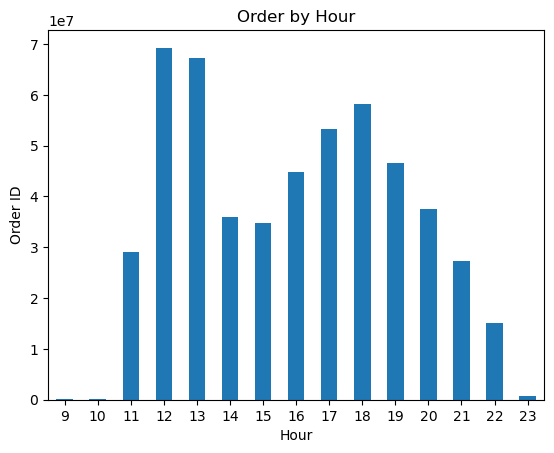

In [37]:
hourly_sales = df.groupby("hour")["order_id"].sum()

hourly_sales.plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Order by Hour")
plt.xlabel("Hour")
plt.ylabel("Order ID")

plt.show()

**Peak sales occur around 12 PM**

## Sales by Day of Week

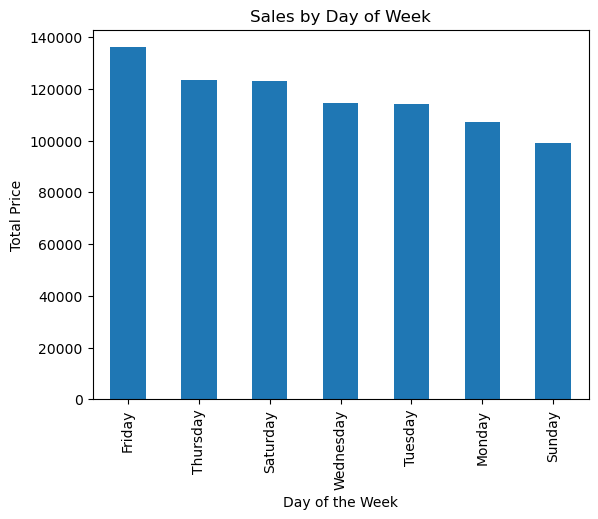

In [38]:
sales_by_day = df.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False) 

sales_by_day.plot(kind="bar")
plt.title("Sales by Day of Week")
plt.xticks(rotation=90)
plt.xlabel("Day of the Week")
plt.ylabel("Total Price")

plt.show()

**The highest sales occur on Friday**

## Top 5 bestselling pizzas.

In [39]:
# Top 5 Bestselling Pizzas (by Quantity)

top_5 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5) 

top_5

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

## Monthly Sales Trend

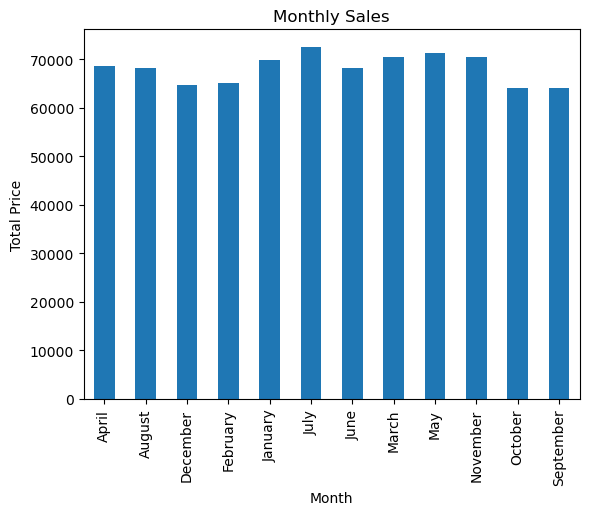

In [40]:
monthly_sales = df.groupby("month")["revenue"].sum()

monthly_sales.plot(kind="bar")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Price")

plt.show()

**Sales increase during July months**, **possible seasonal pattern observed**

## Underperforming Pizzas

In [41]:
worst_pizzas = df.groupby("name")["quantity"].sum().sort_values().head(5)

worst_pizzas 

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

**These pizzas may need promotion or removal from the menu**

## Busiest Day + Hour Combination

In [42]:
df.groupby(["day_of_week", "hour"])["order_id"].count().sort_values(ascending=False).head(10)

day_of_week  hour
Thursday     12      1106
Monday       12      1101
Thursday     13      1095
Tuesday      12      1068
Friday       12      1064
Wednesday    12      1021
Friday       13      1020
Tuesday      13       988
Friday       18       926
Wednesday    13       907
Name: order_id, dtype: int64

## Sales Contribution Percentage

In [43]:
pizza_revenue = df.groupby("name")["revenue"].sum()
percentage = (pizza_revenue / pizza_revenue.sum()) * 100
percentage.sort_values(ascending=False).head(10)

name
The Thai Chicken Pizza          5.310719
The Barbecue Chicken Pizza      5.229257
The California Chicken Pizza    5.063152
The Classic Deluxe Pizza        4.668341
The Spicy Italian Pizza         4.258828
The Southwest Chicken Pizza     4.243483
The Italian Supreme Pizza       4.093213
The Hawaiian Pizza              3.946060
The Four Cheese Pizza           3.945137
The Sicilian Pizza              3.783104
Name: revenue, dtype: float64